In [35]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [36]:
import os
import pandas as pd

In [37]:
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [38]:
torch.cuda.set_device(1)

In [39]:
PATH = 'words/'
csv_path = PATH + 'csv_files/g06.csv'
n = len(list(open(csv_path))) - 1 # -1 to ignore the header line
n

11626

In [40]:

arch = vgg19
sz = 64
bs = 64
val_idxs = get_cv_idxs(n)
tfms = tfms_from_model(arch, sz)

data = ImageClassifierData.from_csv(path = PATH, folder = 'png_files', 
                                    csv_fname = csv_path, bs = bs, 
                                    tfms = tfms, val_idxs = val_idxs, 
                                    test_name = None )

In [41]:
# comparing instances of dataset object and original data

# picking first image (index 0)
x1 = data.trn_ds.get_x(0)

# picking file name of first image
path = data.trn_ds.fnames[0]
x2 = plt.imread(PATH + path)
# image in grayscale, repeat it 3 times to get RGB values
x2 = np.stack((x2, x2, x2), axis = 2)



(-0.5, 133.5, 63.5, -0.5)

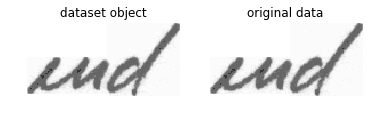

In [42]:
fig, ax = plt.subplots(1, 2)
ax[0].imshow(x1)
ax[0].axis('off')
ax[0].set(title = 'dataset object')
ax[1].imshow(x2)
ax[1].set(title = 'original data')
ax[1].axis('off')

In [43]:
fn = [PATH + data.trn_ds.fnames[0]]; fn

['words/png_files/g06-011a-00-02.png']

In [44]:
def get_data(sz):
    tfms = tfms_from_model(f_model, sz)
    return ImageClassifierData.from_csv(path = PATH, folder = 'png_files', 
                                    csv_fname = csv_path, 
                                    tfms = tfms, val_idxs = val_idxs, 
                                    test_name = None )

In [45]:
learn = ConvLearner.pretrained(arch, data)

 90%|████████▉ | 131/146 [00:49<00:05,  2.62it/s, loss=21.2]

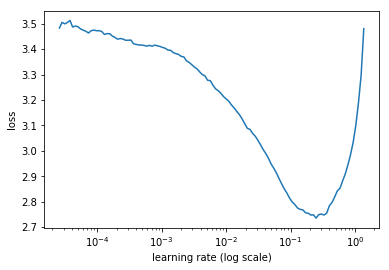

In [46]:
lrf=learn.lr_find()
learn.sched.plot()

In [47]:
lr = 0.02
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy                   
    0      1.868328   1.446469   0.56086   
    1      1.595533   1.192822   0.628817                   
    2      1.431455   1.153646   0.642151                   
    3      1.435232   1.114636   0.650753                   
    4      1.352645   1.058277   0.668387                   
    5      1.274432   1.02746    0.686882                   
    6      1.255911   1.016756   0.687312                   


[array([1.01676]), 0.6873118279698075]

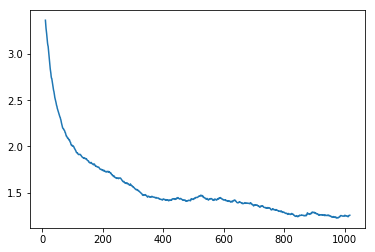

In [48]:
learn.sched.plot_loss()

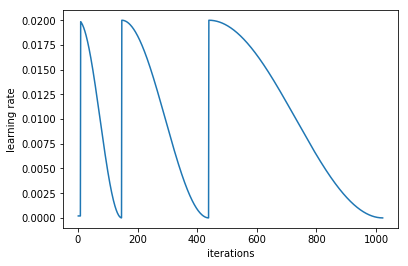

In [49]:
learn.sched.plot_lr()

In [50]:
lrs = np.array([lr/9,lr/3,lr])
learn.unfreeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy                    
    0      0.652454   0.393869   0.865806  
    1      0.46369    0.305554   0.898495                    
    2      0.315771   0.237227   0.92172                     
    3      0.374716   0.338903   0.882581                    
    4      0.298673   0.221394   0.92129                     
    5      0.234194   0.191336   0.938495                    
    6      0.188255   0.183164   0.941935                    


[array([0.18316]), 0.9419354839222406]

In [51]:
learn.save(f'{sz}')

In [52]:
tmfs = tfms_from_model(arch, sz, aug_tfms = transforms_side_on, max_zoom = 1.1)

In [53]:
data = ImageClassifierData.from_csv(path = PATH, folder = 'png_files', 
                                    csv_fname = csv_path, 
                                    tfms = tfms, val_idxs = val_idxs, 
                                    test_name = None )

In [54]:
learn_data_agumentation = ConvLearner.pretrained(arch, data)

 91%|█████████ | 133/146 [00:44<00:04,  2.99it/s, loss=16]  

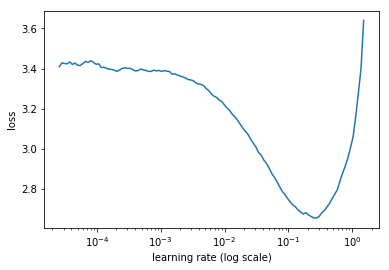

In [55]:
lrf=learn_data_agumentation.lr_find()
learn_data_agumentation.sched.plot()

In [56]:
lr = 0.02
learn_data_agumentation.fit(lr, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy                   
    0      1.836694   1.464952   0.551398  
    1      1.590561   1.207648   0.619785                   
    2      1.417087   1.159804   0.643871                   
    3      1.430617   1.125686   0.63828                    
    4      1.362591   1.063471   0.662796                   
    5      1.285003   1.035838   0.677849                   
    6      1.242849   1.024462   0.684731                   


[array([1.02446]), 0.6847311830264265]

In [57]:
lrs = np.array([lr/9,lr/3,lr])
learn_data_agumentation.unfreeze()
learn_data_agumentation.fit(lrs, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy                    
    0      0.650611   0.377104   0.87914   
    1      0.485643   0.327091   0.886452                    
    2      0.314962   0.240426   0.916989                    
    3      0.368626   0.285922   0.907957                    
    4      0.317704   0.233276   0.923441                    
    5      0.229979   0.201636   0.932043                    
    6      0.198602   0.190766   0.937204                    


[array([0.19077]), 0.9372043011265416]

In [58]:
multi_preds, y = learn.TTA()
preds = np.mean(multi_preds, 0)

In [59]:
accuracy_np(preds, y)

0.9483870967741935

In [60]:
multi_preds, y = learn_data_agumentation.TTA()
preds = np.mean(multi_preds, 0)

In [61]:
accuracy_np(preds,y)

0.9436559139784946